In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def fem_solver(n, L=1.0):
    h = L/n
    N = n+1
    M = np.zeros((N,N))
    x = np.linspace(0,1,N)

    for i in range(N):
        if i==0 or i==N-1:
            M[i,i] = 2
        else:
            M[i,i] = 4
        if i < N-1:
            M[i,i+1] = M[i+1,i] = 1
    
    M *= h/6

    K = np.zeros((N,N))
    for i in range(N):
        if i==0 or i==N-1:
            K[i,i] = 1
        else:
            K[i,i] = 2
        if i < N-1:
            K[i,i+1] = K[i+1,i] = -1
    
    K *= 1/h

    # F = np.zeros(N)
    # def rhs(x):
    #     return (1 + np.pi**2) * np.cos(np.pi*x)

    
    def rhs(x):
        u = np.cos(np.pi * x)
        return (np.pi**4 + np.pi**2 + 1) * u 

    F = rhs(x)

    F = M @ F
    # F = np.zeros_like(F)
    return M, K, F, h

M, K, F,h = fem_solver(n=4)
print("Solution coefficients a:\n", (M/(h/6)).astype(int))
print("Solution coefficients a:\n", M)
print("Solution coefficients a:\n", F)


Solution coefficients a:
 [[2 1 0 0 0]
 [1 4 1 0 0]
 [0 1 4 1 0]
 [0 0 1 4 1]
 [0 0 0 1 2]]
Solution coefficients a:
 [[0.08333333 0.04166667 0.         0.         0.        ]
 [0.04166667 0.16666667 0.04166667 0.         0.        ]
 [0.         0.04166667 0.16666667 0.04166667 0.        ]
 [0.         0.         0.04166667 0.16666667 0.04166667]
 [0.         0.         0.         0.04166667 0.08333333]]
Solution coefficients a:
 [ 1.22134163e+01  1.72723789e+01  1.54911552e-15 -1.72723789e+01
 -1.22134163e+01]


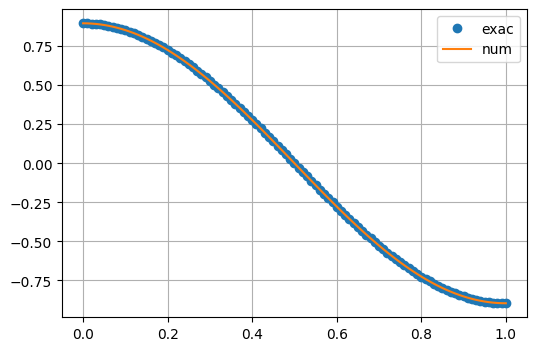

7.033674693615266e-05 0.00022097849456674475


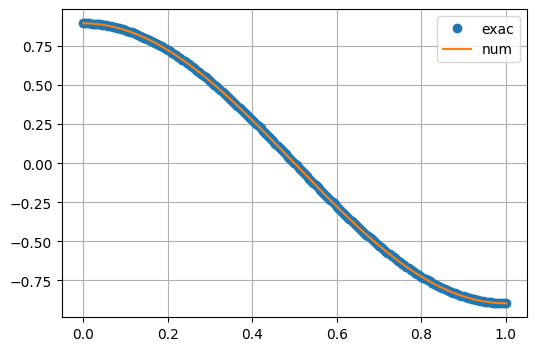

6.647646058496808e-05 0.00020884410728735215


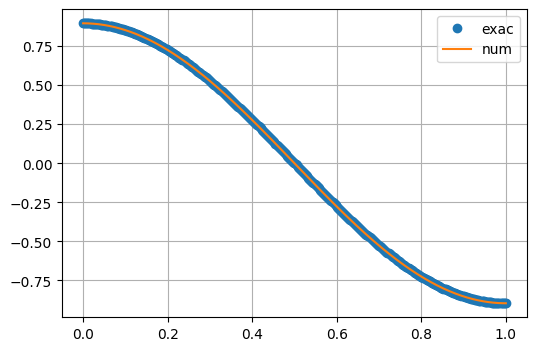

6.551134051839795e-05 0.00020581047507450066


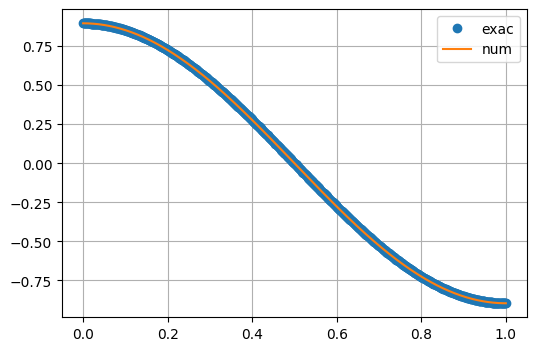

6.527005745978167e-05 0.0002050520647716647


In [3]:
t = 0
dt = 0.00001
step_sizes = [101,201,401,801]
T = 0.01
# print(u.shape)
c = (np.pi**2 + 1)
for n in step_sizes:
    t = 0
    x = np.linspace(0,1,n)
    u = np.exp(-c*t)*np.cos(np.pi*x)
    F = np.zeros(n)

    while t < T:

        M, K, _,h = fem_solver(n-1)        

        u_e = np.exp(-c*t)*np.cos(np.pi*x)

        A1 = K+(1+1.0/dt)*M

        F1 = 1.0/dt*M@u

        ans = np.linalg.solve(A1, F1)
        u_num = ans

        u = u_num

        err = u_e - u_num
        err_L2 = np.sqrt(err.T@M@err)
        err_H1 = np.sqrt(err.T@K@err)


        # u_err = np.linalg.norm(u_e-u_num)

        t += dt

    plt.figure(figsize=(6,4))
    plt.plot(x,u_e,'o',label='exac')
    plt.plot(x,u_num,label='num')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(err_L2, err_H1)


    # print(M)

    

# print(A1.shape)
# print(t)
# ans = np.linalg.solve(A1, F_res)

# print(ans)
